# Capítulo 7
## Mapas con `cartopy` y `PyGMT`

Estos dos paquetes están en creación, con versiones `v0.1.2` y `v0.18.0`. El hecho que las versiones para ambos paquetes empiezan con `0.x.t`, significa que los paquetes están en etapa de desarrollo. Esto también significa que los comandos pueden cambiar bruscamente y no hay necesariamente compatibilidad con versiones anteriores. 

`PyGMT` (<a href="https://www.pygmt.org/latest/">link</a>) es un paquete que utiliza el famoso programa `GMT` o Generic Mapping Tools cuya primera versión fue creada en 1988. `GMT` es un programa (versión actual 6.0) de lineas de comando que genera figuras *postscript* p `PS`. Estas figuras se pueden convertir a `PDF` fácilmente. Adicionalmente tiene varias funciones para generar figuras cartesianas, mapas, filtros y mucho más, que no vamos a ver acá. Seguramente muchos de las figuras en los artículos en revistas científicas usan `GMT`. Por lo tanto `PyGMT` utiliza `GMT` para generar sus figuras. 

`cartopy` (<a href="https://scitools.org.uk/cartopy/">cartopy</a>) es un paquete para procesamiento de datos geoespaciales y producir mapas. La gran diferencia es que `cartopy` usa `matplotlib` para generar los mapas y por lo tanto tiene todas las ventajas interactivas de `matplotlib` y su *lenguaje* sigue las reglas que hemos aprendido. 

En esta sección se mostrará como generar mapas de alta calidad con ambos paquetes. No es una compilación exhaustiva de todas las capacidades de ambos paquetes, simplemente una introducción.  

## `cartopy`

Para la generación de un mapa en `cartopy` y `pyGMT` se debe hacer una proyección para *aplanar* el globo terráqueo a una superficie plana (la pantalla del computador o una hoja de papel) para hacer un mapa, lo que requiere una transformación sistemática de latitud y longitud en la esfera a (x,y) en un plano. Toda proyección de la esfera al plano necesariamente distorsiona la superficie. Dependiendo de lo que se quiera, algunas distorsiones son aceptables y otras no, por lo que es importante saber que tipo de proyeccion se quiere utilizar. 

Un primer ejemplo de un mapa a escala global. Note como la forma de hacer las figuras es similar a utilizar `matplotlib`.

In [1]:
# cartomap01.py
# Mapa global general
#
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Proyección PlateCaree 
proj0 = ccrs.PlateCarree(central_longitude=180.0)

fig = plt.figure(figsize=(10,8))


<Figure size 720x576 with 0 Axes>

#### Explicación

Lo primero es la proyección `Plate Carree` o proyección geográfica que usa
```
proj0 = ccrs.PlateCarree(central_longitude=180.0)
...
ax1  = fig.add_subplot(111,projection=proj0)
```
donde el `axes=ax` presenta la proyección de la esfera a un plano. En este momento la figura está vacía. Adicionalmente se centra la figura en la longitud deseada `central_longitude=180.0` o `0.0` si no se define. 

Posteriormente se grafican las lineas de costa
```
ax.coastlines()
```
`cartopy` de manera automática crea un borde de la figura, pero no pone los valores en los ejes (latitud y longitud). Este se puede adicionar con
```
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=proj0)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj0)
```


### Hazlo tu mismo

Genera un mapa global, con una proyección esférica (`Mollweide` o `Orthographic`), centrada en Suramérica. Adiciona una imagen de lo topografía con `ax.stock_img()`.

In [2]:
# cartomap02.py
# Mapa del globo general com topografía
#
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#proj = ccrs.Mollweide(central_longitude=-90.0)
proj = ccrs.Orthographic(central_longitude=-90.0)


Para la imagen de fondo, que muestra en colores la topografía y batimetría `cartopy` tiene previamente cargada la imagen y simplemente la incluye con la proyecciónh deseada a través de `ax.stock_img()`. Esta es una imagen de baja resolución, asi que al hacer `zoom` en alguna parte de la figura, se vería mal. Para mayor resoluci´øn de la topografía ver más adelante.  

Otras proyecciones se pueden encontrar con descripción <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html"> acá </a>


### Hazlo tu mismo

Los paquetes de mapas, además tienen la posibilidad de incluir otro tipo de información geográfica como ríso, lagos, fronteras políticas, etc. 

Genere un mapa de Suramérica, que incluya los límites políticos. 


In [3]:
# cartomap03.py
# Mapa Suramérica con limites políticos
#
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

reg = [-85, -35, -60, 15]

fig = plt.figure(figsize=(10,8))


<Figure size 720x576 with 0 Axes>

El código tiene la misma estructura que los anteriores, excepto por la región que se define con
```
ax.set_extent(reg)
```
Para adicionar los límites políticos
```
ax.add_feature(cfeature.BORDERS, linestyle=':')
```
que quedan con una linea punteada. 


### Hazlo tu mismo

A veces sólo queremos mostrar un mapa con colores, donde se separe los cuerpos de agua de tierra. Genere dos mapas, uno general en la región `[-170, -100, 20, 60]` y el otro un zoom en la región `[-130, -120, 46, 52]`. El objetivo es que el mar esté de azul y la Tierra de otro color. 


In [4]:
# cartomap04.py
# Mapa con Tierra y oceano, dos escalas
#
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

reg1 = [-170, -100, 20, 60]
reg2 = [-130, -120, 46, 52]
proj = ccrs.Mercator()



#### Explicación

Comenzando con la definición de la proyección (Mercator) `proj = ccrs.Mercator()` se generan los dos subplots
de igual manera a lo que hacemos con `matplotlib`. 
```
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2, 1, 1, projection=proj)
...
ax2 = fig.add_subplot(2, 1, 2, projection=proj)
```
Para la primera región (la grande)

```
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN,color='lightblue') 
ax1.coastlines(resolution='50m')

```
se incluyen `features` de tierra y océano (`cfeature.LAND` y `cfeature.OCEAN`), las líneas de costa y se puede adicionar un cuadro que muestre la zona o región más pequeña
```
ax1.plot([-130, -130, -120, -120, -130], [46, 52, 52, 46, 46],
         color='red', linestyle='--',
         transform=ccrs.PlateCarree(),
         )
```
Para la segunda región (la pequeña), en principio podríamos hacer exactamente lo mismo. Sin embargo, se muestra otra forma de utilizar `features`, que simplemente descargan *shapefiles* de mayor resolución de las bases de datos de <a href="http://www.naturalearthdata.com/">Natural Earth Data</a> o de la base de datos <a href="https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html">GSHHS</a>.

```
ax2 = fig.add_subplot(2, 1, 2, projection=proj)
ax2.set_extent(reg2)
ax2.add_feature(
            cfeature.GSHHSFeature(scale='auto'),
            facecolor=cfeature.COLORS['land'],
        )
ax2.patch.set_facecolor('lightblue')
```
Note que en este caso se descarga la información de Tierra y se pone el fondo de color azul (el océano).

### Hazlo tu mismo

Genere un mapa similar al anterior para Colombia y sus alrededores, incluyendo limites políticos de paises y los ríos principales en color azul. 



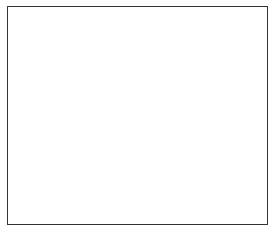

In [5]:
# cartomap05.py
# Colombia, rios y fronteras
#
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj4 = ccrs.Mercator()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=proj4)
ax.set_extent([-90, -60, -10, 15])

# Descargue info de fronteras y ríos de Natural Earth Data


Para extraer la información del shapefile de fronteras
```
countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='10m',
        facecolor='none')
```
se define la categoría (`cultural` o `physical`), el nombre del shapefile 
(`admin_0_boundary_lines_land`) y la escala (`10m`). 

Igualmente se hace para los ríos, una propiedad física, con la resolución deseada. 
```
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
```
En este caso `10m` equivale a una escala `1:10.000.000`. 

La información de categorías <a href=https://www.naturalearthdata.com/downloads/10m-physical-vectors/> físicas</a> y <a href=https://www.naturalearthdata.com/downloads/10m-cultural-vectors/> culturales</a> se pueden encontrar en la página de Natural Earth.  


###  Hazlo tu mismo

Como último ejemplo, muchas veces es importante incluir la **topografía** en el mapa, ya que puede mostrar algunos patrones importantes que se quiera resaltar. Además muchas veces queremos desplegar **información adicional** (puntos donde se tomaron datos, una ubicación, etc.), es decir **datos**.  

Los datos en el archivo `rsnc.dat` tiene la latitud y longitud de las estaciones sismológicas del servicio geológico colombiano. Haga un mapa, con topografía en el fondo, de la red sismológica en el territorio colombiano. 

In [6]:
# cartomap06.py
# Con topo, y estaciones lat/lon
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cio
import cartopy.feature as cfeature

# lectura del archivo
fname = 'data/rsnc.dat'
data = pd.read_csv(fname, delim_whitespace=True, header=None)
sta = np.array(data[0])
lat = np.array(data[1])
lon = np.array(data[2])
ele = np.array(data[3])

# descargar topografía
tiler = cio.Stamen('terrain-background')

fig = plt.figure()


<Figure size 432x288 with 0 Axes>

#### Explicación
`cartopy` tiene en `ax.stock_img()` la imagen de baja resolución de la topografía (y batimetría), pero si estamos mirando escalas regionales, esto no es suficiente. 

Para obtener datos de la topografía de mayor resolución, se pueden descargar archivos tipo `tile` con los módulos de cartopy
```
import cartopy.io.img_tiles as cio
...
tiler = cio.Stamen('terrain-background')
```
Los `tile` tienen diferentes resoluciones que se pueden elegir en el momento de generar el mapa
```
...
ax.add_image(tiler, 6)
...
ax.coastlines()
```
Finalmente se pueden graficar las estaciones usando el comando simple 
```
ax.plot(lon,lat,label='Estaciones')
``` 
como se haría en una figura normal, incluyendo la leyenda explicativa. La proyección se tendrá en cuenta. 

### `pyGMT`

El paquete de `pyGMT` no está basado en `matplotlib` y dado que se basa en `GMT`, las figuras que se generan son figuras `PS` o postscript, por lo que no tiene la capacidad de interacción que si tiene `cartopy`. 

Para demostrar las ventajas y desventajas de ambos paquetes, haremos los mismos ejercicios con `pyGMT` que se hicieron arriba con `cartopy`. Es decisión de Ud. escoger el que más le gusta o usar ambos dependiendo de lo que quiera hacer. 



### Hazlo tu mismo

Un primer ejemplo de un mapa a escala global. 

In [7]:
# gmtmap01.py
# Mapa global general
#
import pygmt

# Proyección Cilíndrica
proj = 'Cyl_stere/180/0/8i'

fig = pygmt.Figure()


#### Explicación

Lo primero, es importar el paquete con `import pygmt`. La proyección utilizada en este caso es una cilíndrica estereográfica
```
proj = 'Cyl_stere/180/0/8i'
```
centrada en longitud 180 y latitud 0. El tamaño de la figura es de `8i`, ocho pulgadas. 

Para iniciar la figura
```
fig = pygmt.Figure()
```
Note la diferencia con `matplotlib`. 

El comando `coast` dibuja las líneas de costa
```
fig.coast(
    region='g',
    projection=proj,
    shorelines=True,
    water=False,
    land=False,
    frame=True,
)
```
donde se debe definir la región, que en nuestro caso es `g` global. Se permite definir regions por siglas de países, estados (de EEUU) o definir los límites `[lon1, lon2, lat1, lat2]`. Se define también la proyección y si se quiere dibujar las líneas de costa con `shoreline=True`. Se puede solicitar que se coloree el agua o la Tierra aunque en este ejemplo no se hizo. Por ejemplo `water='lightblue` colorea el mar de azul.  

Por último, y en este caso es **necesario**, se debe pedir explicitamente que la figura sea mostrada con
```
fig.show()
```

### Hazlo tu mismo

Genera un mapa global, con una proyección esférica (ortográfica `-G` o Mollweide `Moll`), 
centrada en Suramérica. Adiciona una imagen de lo topografía con `grdimage`.

In [9]:
# gmtmap02.py
# Mapa del globo general con topografía
#
import pygmt

#proj = 'Moll/-70/4.5i',    
proj = 'G-70/0/4.5i'
fig = pygmt.Figure()


La proyección ortográfica se solicita con `G-70/0/4.5i`, centrada en longitud `-70` y latitud ecuatorial, y genera una figura de 4 pulgadas. 

Para la imagen de fondo se usa `grdimage`
```
fig.grdimage(
    '@earth_relief_30m',
    region='g',
    projection=proj,
    cmap='globe',
    shading=True,
)
```
y el archivo a utilizar es `@earth_relief_30m`, que es un archivo en la base de datos de GMT, lo baja y lo utiliza.  Es decir, el computador va a bajar el archivo de internet y lo coloca en una ubicación conocida por `pyGMT`. El archivo descargado es un archivo en formato de arreglo o grilla, y le podemos pedir que use una escala de colores (*colormap*) predefinido por GMT (`cmap='globe'`), e incluso ponerle sombra (`shading`). 

Los datos con la topografía y batimetría global tienen multiples resoluciones. Tener cuidado de no usar una resolución muy alta para la escala global, ya que el archivo sería muy pesado (cientos de Gbytes). Las resoluciones disponibles son 
- Para bajas resoluciones (non-tiled) ["01d", "30m", "20m", "15m", "10m", "06m"]

- Para altas resoluciones (tiled)  ["05m", "04m", "03m", "02m", "01m", "30s", "15s", "03s", "01s"]

Las segundas bases de datos están `tiled` o por partes, es decir si uno solicita un archivo de alta resolución, `pyGMT` sólo baja las partes que necesita, baado en la región que se va a graficar. 

Los *colormaps* automaticos de GMT se pueden encontrar <a href="https://docs.generic-mapping-tools.org/latest/cookbook/cpts.html" > acá </a>, pero ud puede diseñar su colormap si así lo quiere (aunque no lo vamos a ver en este curso). Algunos colormap incluyen `seis`, `polar`, `gray`, `etopo1` y muchos más. 


### Hazlo tu mismo

Los paquetes de mapas, además tienen la posibilidad de incluir otro tipo de información geográfica como ríso, lagos, fronteras políticas, etc. 

Genere un mapa de Suramérica, que incluya los límites políticos. 


In [10]:
# gmtmap03.py
# Mapa Suramérica con limites políticos
#
import pygmt

reg  = [-85, -35, -60, 15]
proj = 'M0/0/4i'

fig = pygmt.Figure()


Este mapa usa las mismas herramientas anteriorews, sin embargo dentro del comando `coast` se puede solicitar además de las costas, los límites políticos con `borders=1`. El número `1` representa fronteras políticas de países. Para departamentos o estados el código es `2` y en algunos casos el `3` puede mostrar fronteras entre condados. Para incluir varios límites políticos `borders=[1,2,3]` y si quiere mayor control del formato puede utilizar `["1/0.5p,white", "2/0.5p,red", "3/0.5p,blue"]`. 

Adicionalmente se define la resolución del `shapefile` que tiene las lineas de costa con `resolution='l'`, que en nuestro caso, por ser un mapa general, usamos baja resolución (l=low). Ecisten 5 niveles de resolución (con un cambio de 80% entre niveles):
- "c": crude
- "l": low (default)
- "i": intermediate
- "h": high
- "f": full
Se recomienda no usar inmediatamente la resolución máxima, ya que los `shapefile` pueden ser muy pesados. 

### Hazlo tu mismo

A veces sólo queremos mostrar un mapa con colores, donde se separe los cuerpos de agua de tierra. Genere dos mapas, uno general en la región `[-170, -100, 20, 60]` y el otro un zoom en la región `[-130, -120, 46, 52]`. El objetivo es que el mar esté de azul y la Tierra de otro color. 


In [11]:
# gmtmap04.py
# Mapa con Tierra y oceano, dos escalas
#
import pygmt

reg1 = [-170, -100, 20, 60]
reg2 = [-130, -120, 46, 52]

fig = pygmt.Figure()


#### Explicación

La proyección en ambas figuras será Mercator (`M8i`, `M4i`), los mapas tendrán dos tamaños distintos. Como `pyGMT` no usa el mismo modelo de `matplotlib`, las dos figuras se crean 
```
fig = pygmt.Figure()
fig.coast(
...
fig.shift_origin(xshift='0.2i',yshift='0.1i')  
```
donde usando la misma figura `fig`, se redefine el origen. `GMT` genera las figuras en el orden en que se programa, es decir, si se hace primero la figura pequeña y luego la grande, la grande estaría encima y no se verían las dos. 

Ambas figuras tienen el mismo patrón, y el agua y tierra se colorean con el comando
```
fig.coast(
    ...,
    water='lightblue',
    land='grey',
    frame='f'
)
```
y el `frame` define si existe un cajón que encierre a la figura y si tiene o no valores en los ejes `x` o `y`.



### Hazlo tu mismo

Genere un mapa similar al anterior para Colombia y sus alrededores, incluyendo limites políticos de paises y los ríos principales en color azul. 


In [12]:
# gmtmap05.py
# Colombia, rios y fronteras
#
import pygmt

reg  = [-90, -60, -10, 15]
proj = 'M6i' 
fig = pygmt.Figure()


Para extraer la información del shapefile de fronteras y ríos, dentro del comando `coast`
```
fig.coast(
    ...
    borders=['1/1p,black'],
    rivers= ['1/blue']
    water='lightblue',
    land="white",
    )
```
El comando en ambos casos es `1/1p,color`, donde el primer número es el tipo de característica (rios principales, límites de países, o rios secundarios y límites departamentales. La segunda parte es la descripción las líneas, su tamaño y color. Si Ud. quiere mayor precisión en límites políticos o ríos puede solicitarlo `borders=['1/1p,black','2/0.5p,gray']` o `rivers= ['1/blue','2/blue','3/blue','4/blue']`. 




###  Hazlo tu mismo

Como último ejemplo, muchas veces es importante incluir la **topografía** en el mapa, ya que puede mostrar algunos patrones importantes que se quiera resaltar. Además muchas veces queremos desplegar **información adicional** (puntos donde se tomaron datos, una ubicación, etc.), es decir **datos**.  

Los datos en el archivo `rsnc.dat` tiene la latitud y longitud de las estaciones sismológicas del servicio geológico colombiano. Haga un mapa, con topografía en el fondo, de la red sismológica en el territorio colombiano. 

In [13]:
# gmtmap06.py
# Con topo, y estaciones lat/lon
#
import numpy as np
import pandas as pd
import pygmt

fname = 'data/rsnc.dat'
data = pd.read_csv(fname, delim_whitespace=True, header=None)
sta = np.array(data[0])
lat = np.array(data[1])
lon = np.array(data[2])
ele = np.array(data[3])

reg  = [-90, -60, -5, 15]
proj = 'M6i'

fig = pygmt.Figure()


#### Explicación

Esta tarea combina los diferentes comandos ya utilizados. Primero, la topografía
```
fig.grdimage(
    '@earth_relief_05m',
    ...
    cmap='etopo1',
    shading=True,
)
```
donde se incluye la topografía con resolución suficiente para este mapa, incluyendo sombras.

Sigue la inclusión de los límites y costas
```
fig.coast(
    ...)

```
donde subrimos el agua de azul. Si no se pone `water='lightblue'`, la batimetría estaría desplegada. 

Por último, se ponen las estaciones (lon,lat), indicando que se ponen de color negro y en forma de triángulos. 
```
fig.plot(lon,lat,
    style='t0.2i',
    color='black',
    label='Estaciones',
        )
fig.legend()
```
y se incluye la leyenda explicativa. 

## Cuál escoger?

Antes de contestar, es importante recordar que ambos paquetes están en etapa de desarrollo, 
por lo que pueden mejorar mucho. O volverse muy complicados. 

Ambos tienen ventajas y desventajas y creo que por ahora es cuestión personal sobre cual prefiere. 

## Qué nos faltó?

Hay muchas cosas que uno quiere hacer cuando quiere desplegar información en mapas. En los ejemplos mostrados, se usó en ambos casos información de `shapefiles` y `tiles` disponibles, por lo que no hemos discutido cómo incluir información que Ud pueda tener. Información de shapefiles de carreteras o caminos, o grillas (en formato `NetCDF`por ejemplo) con información que el usuario haya tomado en campo (gravimetría, sísmica, etc.). 

En ambos paquetes es posible desplegar esta información, sin embargo está por fuera del enfoque introductorio del curso y seguramente Ud puede averiguar como incluir sus datos y ponerlos en un mapa con `cartopy` o con `pyGMT`. 
